# 13강
- Dataset Preprocessing

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

train_ds = tfds.load(name = 'mnist',
                     shuffle_files=True,
                     as_supervised=True,
                     split='train',
                     batch_size=4)

for images, labels in train_ds:
  print(images.shape)
  print(images.dtype)

  print(tf.reduce_max(images)) # 반드시 scaling해주어야함, weight의 변동이 너무커지기 때문.
  break

(4, 28, 28, 1)
<dtype: 'uint8'>
tf.Tensor(255, shape=(), dtype=uint8)


In [5]:
t1 = tf.constant([1, 2, 3, 4, 5])
print(t1.dtype)
t2 = tf.cast(t1, tf.float32) # casting
print(t2.dtype)

<dtype: 'int32'>
<dtype: 'float32'>


In [7]:
# 0부터 1까지의 값을 갖도록
# float32형식을 갖도록
# 함수를 이용해 한번에 해줄 수 있었다!
def standardization(images, labels):
  images = tf.cast(images, tf.float32) / 255.
  return [images, labels]

train_ds, test_ds = tfds.load(name = 'mnist',
                     shuffle_files=True,
                     as_supervised=True,
                     split=['train','test'],
                     batch_size=4)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.dtype, tf.reduce_max(images))

# 텐서에도 map 가능
train_ds = train_ds.map(standardization)
test_ds = test_ds.map(standardization)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.dtype, tf.reduce_max(images))

<dtype: 'uint8'> tf.Tensor(255, shape=(), dtype=uint8)
<dtype: 'float32'> tf.Tensor(1.0, shape=(), dtype=float32)


In [8]:
def mnist_data_loader():
  def standardization(images, labels):
    images = tf.cast(images, tf.float32) / 255.
    return [images, labels]

  train_ds, test_ds = tfds.load(name = 'mnist',
                       shuffle_files=True,
                       as_supervised=True,
                       split=['train','test'],
                       batch_size=4)
  
  train_ds = train_ds.map(standardization)
  test_ds = test_ds.map(standardization)
  return train_ds, test_ds

train_ds, test_ds = mnist_data_loader()
print(train_ds)

<MapDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


# 14강
- Losses and Metrics

In [10]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, SparseCategoricalAccuracy

loss_object = BinaryCrossentropy()

predictions = np.array([0.3]).reshape(-1, 1)
labels = np.array([1])

loss = loss_object(labels, predictions)
loss_manual = -1*((labels*np.log(predictions)) + \
                  (1-labels)*np.log(1-predictions))
print(loss.numpy())
print(loss_manual)

1.2039724588394165
[[1.2039728]]


In [12]:
# label 이 vector형식([0, 1])인 경우
predictions = np.array([0.3, 0.6]).reshape(-1, 1)
labels = np.array([1, 0]).reshape(-1, 1)

loss = loss_object(labels, predictions)
loss_manual = -1*((labels*np.log(predictions)) + \
                  (1-labels)*np.log(1-predictions))
loss_manual = np.mean(loss_manual)

print(loss.numpy())
print(loss_manual)

1.0601314306259155
1.0601317681000455


In [19]:
predictions = np.array([[0.3, 0.7], [0.4, 0.6], [0.1, 0.9]])
labels = np.array([[0,1], [1,0], [1,0]])

loss = loss_object(labels, predictions)
loss_manual = -1*labels*np.log(predictions)
loss_manual = np.sum(loss_manual, axis=1)
loss_manual = np.mean(loss_manual)

print(loss.numpy())
print(loss_manual)

1.1918498277664185
1.1918502562689777


In [28]:
loss_object = CategoricalCrossentropy()

predictions = np.array([[0.2, 0.1, 0.7], [0.4, 0.3, 0.3], [0.1, 0.8, 0.1]])
labels = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])

print(predictions)
print(labels)

loss = loss_object(labels, predictions)
loss_manual = -1*labels*np.log(predictions)
loss_manual = np.sum(loss_manual, axis=1)
loss_manual = np.mean(loss_manual)

print(loss.numpy())
print(loss_manual)

[[0.2 0.1 0.7]
 [0.4 0.3 0.3]
 [0.1 0.8 0.1]]
[[0 0 1]
 [0 1 0]
 [1 0 0]]
1.2877442836761475
1.2877442804195713


In [32]:
loss_object = SparseCategoricalCrossentropy()

predictions = np.array([[0.2, 0.1, 0.7], [0.4, 0.3, 0.3], [0.1, 0.8, 0.1]])
labels = np.array([2, 1, 0])

loss = loss_object(tf.constant(labels), tf.constant(predictions))

ce_loss =0
for data_idx in range(len(labels)):
  prediction = predictions[data_idx]
  label = labels[data_idx]

  t_prediction = prediction[label]
  ce_loss += -1*np.log(t_prediction)
ce_loss = ce_loss / len(labels)

print(loss.numpy())
print(ce_loss)

1.2877442836761475
1.2877442804195713


In [35]:
import tensorflow_datasets as tfds

train_ds = tfds.load(name = 'mnist',
                     shuffle_files=True,
                     as_supervised=True,
                     split='train')

train_ds = train_ds.batch(8)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter) 
print(labels) # Sparse를 써야겠구나!

tf.Tensor([4 1 0 7 1 8 2 7], shape=(8,), dtype=int64)


In [37]:
metric = CategoricalAccuracy()

predictions = np.array([[0.2, 0.1, 0.7], [0.4, 0.3, 0.3], [0.1, 0.8, 0.1]])
labels = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])

acc = metric(labels, predictions)

print(acc*100)

tf.Tensor(33.333336, shape=(), dtype=float32)


In [40]:
metric = SparseCategoricalAccuracy()

predictions = np.array([[0.2, 0.1, 0.7], [0.4, 0.3, 0.3], [0.1, 0.8, 0.1]])
labels = np.array([2, 1, 0])

acc = metric(labels, predictions)
print(acc*100)

tf.Tensor(33.333336, shape=(), dtype=float32)


# 15강
- Multicalss Classification

(-1.2, 1.2)

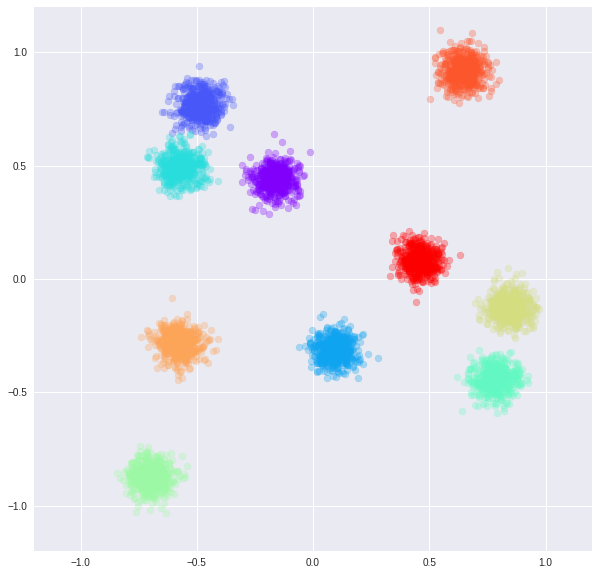

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

np.random.seed(1)
plt.style.use('seaborn')

n_class, n_data = 10, 500
noise = 0.05

x_data = np.empty(shape=(0, 2))
y_data = np.empty(shape=(0, 1))

# multiclass dataset generation
cmap = cm.get_cmap('rainbow', lut=n_class)
fig, ax = plt.subplots(figsize = (10, 10))
for class_idx in range(n_class):
  center = np.random.uniform(-1, 1, (2, ))
  
  x1_data = center[0] + noise*np.random.normal(0, 1, (n_data, 1))
  x2_data = center[1] + noise*np.random.normal(0, 1, (n_data, 1))

  class_x_data = np.hstack((x1_data, x2_data)) # 500 by 2
  class_y_data = class_idx*np.ones((n_data, 1))

  x_data = np.vstack((x_data, class_x_data)).astype(np.float32)
  y_data = np.vstack((y_data, class_y_data)).astype(np.int32)

  ax.scatter(x1_data, x2_data, color=cmap(class_idx),
             alpha = 0.3)
  
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])


In [68]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_ds = train_ds.shuffle(1000).batch(8)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

# instantiate training object
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Mean, SparseCategoricalAccuracy

loss_object = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate = 0.01) 

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

@tf.function
def trainer():
  global train_ds, model, loss_object, optimizer
  global train_loss, train_acc

  for inputs, labels in train_ds:
    with tf.GradientTape() as tape:
      predictions = model(inputs)
      loss = loss_object(labels, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_acc(labels, predictions)

# define reporter
def train_report():
  global epoch
  global train_loss, train_loss

  print(colored('Epoch: ', 'red', 'on_white'), epoch +1)
  template ='Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n'
  print(template.format(train_loss.result(), train_acc.result()*100))

  train_loss.reset_states()
  train_acc.reset_states()

EPOCHS = 50

for epoch in range(EPOCHS):
  trainer()
  train_report()

Epoch:  1
Train Loss: 0.3847	 Train Accuracy: 91.90%

Epoch:  2
Train Loss: 0.0478	 Train Accuracy: 98.82%

Epoch:  3
Train Loss: 0.0138	 Train Accuracy: 99.66%

Epoch:  4
Train Loss: 0.0550	 Train Accuracy: 98.52%

Epoch:  5
Train Loss: 0.0749	 Train Accuracy: 98.80%

Epoch:  6
Train Loss: 0.0421	 Train Accuracy: 99.10%

Epoch:  7
Train Loss: 0.0048	 Train Accuracy: 99.80%

Epoch:  8
Train Loss: 0.0072	 Train Accuracy: 99.84%

Epoch:  9
Train Loss: 0.0066	 Train Accuracy: 99.76%

Epoch:  10
Train Loss: 0.0080	 Train Accuracy: 99.74%

Epoch:  11
Train Loss: 0.0685	 Train Accuracy: 99.00%

Epoch:  12
Train Loss: 0.0151	 Train Accuracy: 99.58%

Epoch:  13
Train Loss: 0.0205	 Train Accuracy: 99.64%

Epoch:  14
Train Loss: 0.0039	 Train Accuracy: 99.90%

Epoch:  15
Train Loss: 0.0080	 Train Accuracy: 99.68%

Epoch:  16
Train Loss: 0.0035	 Train Accuracy: 99.86%

Epoch:  17
Train Loss: 0.0050	 Train Accuracy: 99.80%

Epoch:  18
Train Loss: 0.0182	 Train Accuracy: 99.64%

Epoch:  19
Train Lo

(100, 100) (100, 100)
(10000,) (10000,)


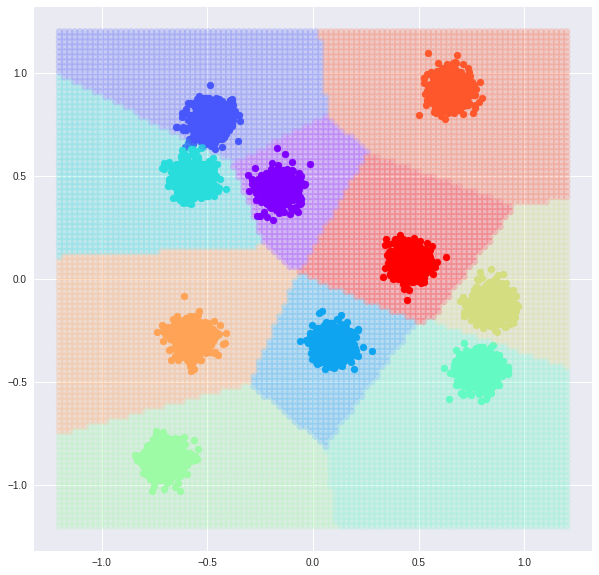

In [65]:
x1_test = np.linspace(-1.2, 1.2, 100)
x2_test = np.linspace(-1.2, 1.2, 100)

x1, x2 = np.meshgrid(x1_test, x2_test)
print(x1.shape, x2.shape)

x1_test, x2_test = x1.flatten(), x2.flatten()
print(x1_test.shape, x2_test.shape)

x_test = np.hstack((x1_test.reshape(-1, 1),
                    x2_test.reshape(-1, 1)))

y_test = model(x_test).numpy()
predictions = np.argmax(y_test, axis = 1)

cdict = {i:cmap(i) for i in range(n_class)}
color_arr = [cdict[pred] for pred in predictions]

fig, ax = plt.subplots(figsize=(10, 10))
for class_idx in range(n_class):
  ax.scatter(x_data[class_idx*n_data : (class_idx+1)*n_data, 0],
             x_data[class_idx*n_data : (class_idx+1)*n_data, 1],
             color = cmap(class_idx))

ax.scatter(x1_test, x2_test, c= color_arr,
           alpha = 0.2)

(100, 100) (100, 100)
(10000,) (10000,)


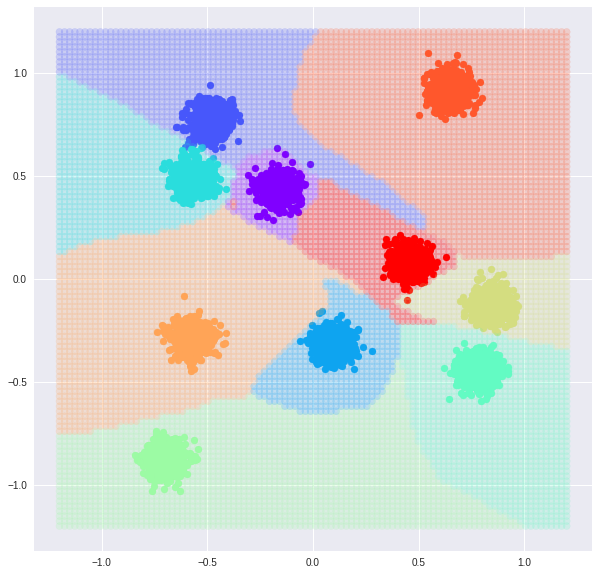

In [69]:
x1_test = np.linspace(-1.2, 1.2, 100)
x2_test = np.linspace(-1.2, 1.2, 100)

x1, x2 = np.meshgrid(x1_test, x2_test)
print(x1.shape, x2.shape)

x1_test, x2_test = x1.flatten(), x2.flatten()
print(x1_test.shape, x2_test.shape)

x_test = np.hstack((x1_test.reshape(-1, 1),
                    x2_test.reshape(-1, 1)))

y_test = model(x_test).numpy()
predictions = np.argmax(y_test, axis = 1)

cdict = {i:cmap(i) for i in range(n_class)}
color_arr = [cdict[pred] for pred in predictions]

fig, ax = plt.subplots(figsize=(10, 10))
for class_idx in range(n_class):
  ax.scatter(x_data[class_idx*n_data : (class_idx+1)*n_data, 0],
             x_data[class_idx*n_data : (class_idx+1)*n_data, 1],
             color = cmap(class_idx))

ax.scatter(x1_test, x2_test, c= color_arr,
           alpha = 0.2)